<img src="logoitesojupyter.png"><br>
<h1><center>Proyecto de Aplicación: Manejo de Datos y de Similitud</center></h1><br>
<center>DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA (DEAM) </center><br>
<center><strong>Materia</strong>: Ciencia de Datos e Ingeligencia de Negocios</center><br>
<center>Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO), A. C. </center><br>
<center><strong>Prof</strong>. Gaddiel Desirena </center><br>
<center><strong>Periodo</strong>: Otoño 2020 </center><br>
<center><strong>Programa</strong>: Igeniería Financiera </center>

<p><font color = "blue"><center><b><strong>Nombre de los integrantes:</strong></b></center></font>
<center>Moisés Flores Ortiz. Exp. 722183 </center>
<center>Aranzazú Rendón Gómez. Exp. </center>
<center>Miriam Eunice Rosas Medellín. Exp. 721272</center></p>

**Aquí escribimos el objetivo de nuestro análisis (planteamiento del problema, justiificación, objetivos, etc.).**

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import scipy.spatial.distance as sc
import matplotlib.pyplot as plt
import numpy as np
from CDIN import CDIN as eda

In [2]:
# Importar datos
data = pd.read_csv("../DATA/7210_1.csv")
# Mostrar datos
data.head(5)

C:\Users\miria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. EDA

## EDA - Limpieza de Datos

In [3]:
#Hacer reporte de calidad de datos
report = eda.dqr(data)
# Mostrar reporte
report

,data_types,missing_values,present_values,unique_values,min,max
id,object,0,33801,9996,AVpe--5gLJeJML43zzQk,AVtidDQ-nnc1JgDc5U4Q
asins,object,31379,2422,1245,NaN,NaN
brand,object,984,32817,1360,NaN,NaN
categories,object,0,33801,894,"#23400 in,Halloween,Accessories,#97541 in,#341...","toys,Shoes,Women's Shoes"
colors,object,13957,19844,2065,NaN,NaN
count,float64,33801,0,0,NaN,NaN
dateAdded,object,0,33801,7006,2014-02-20T04:07:06Z,2017-04-12T13:57:14Z
dateUpdated,object,0,33801,6506,2016-01-01T17:02:12Z,2017-04-13T20:49:51Z
descriptions,object,5376,28425,7186,NaN,NaN
dimension,object,32624,1177,100,NaN,NaN


In [4]:
# Seleccionar columnas útiles para los insigths y limpieza de datos
data = data[["brand", "name", "prices.amountMin", "prices.amountMax", "prices.currency", "colors", "prices.merchant",
             "prices.dateAdded"]]
# Mostrar nueva base de datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant,prices.dateAdded
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-02T16:48:44Z


In [5]:
# Eliminar filas con algún missing value
data.dropna(inplace = True)
# Mostrar base de datos actualizada
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant,prices.dateAdded
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-02T16:48:44Z


In [6]:
# Mostrar las divisas que se utilizan para mostrar los precios
data["prices.currency"].unique()

array(['USD', 'CAD', 'AUD'], dtype=object)

In [7]:
# Quedarse con los precios en dólares para tener un dataset normalizado
data = data[data["prices.currency"] == "USD"]
# Mostrar datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant,prices.dateAdded
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-02T16:48:44Z


In [8]:
# Hacer una nueva columna de precio promedio
data["Precio"] = (data["prices.amountMin"] + data["prices.amountMax"]) / 2
# Mostrar base de datos
data.head(5)

,brand,name,prices.amountMin,prices.amountMax,prices.currency,colors,prices.merchant,prices.dateAdded,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,USD,Purple,Overstock.com,2017-03-02T16:48:44Z,62.99


In [9]:
# Eliminar filas que no interesan ya (precio mínimo, máximo y currency)
data.drop(columns = ["prices.amountMin", "prices.amountMax", "prices.currency"], inplace = True)
# Mostrar los datos
data.head(5)

,brand,name,colors,prices.merchant,prices.dateAdded,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
1,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
2,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
3,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-02T16:48:44Z,62.99


In [10]:
# Eliminar filas duplicadas
data.drop_duplicates(inplace = True)
# Mostrar los datos
data.head(5)

,brand,name,colors,prices.merchant,prices.dateAdded,Precio
0,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-28T11:53:51Z,62.99
4,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-02T16:48:44Z,62.99
5,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-02-03T22:06:24Z,62.99
6,Novica,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Purple,Overstock.com,2017-03-02T16:48:44Z,56.69
10,BEAUTIFEET,"Sof Comfort Women's Everyday Gel Insoles, 2-pair","Multicolor,MULTI",Walmart store - Walmart.com,2016-11-04T03:11:11Z,10.00


In [11]:
# Quedarse con las últimas fechas de un mismo modelo
fechas = pd.DataFrame(data.groupby(by = ["brand", "name", "colors", "prices.merchant", "Precio"])["prices.dateAdded"].max())
data = fechas[fechas["prices.dateAdded"] == fechas.groupby(level = [1])["prices.dateAdded"].transform(max)]
data = data.reset_index()
# Mostrar datos
data.head(5)

,brand,name,colors,prices.merchant,Precio,prices.dateAdded
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77,2017-03-28T11:55:27Z
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.50,2017-03-28T11:55:27Z
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.39,2017-03-28T11:55:27Z
3,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.19,2017-03-28T11:46:32Z
4,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,19.24,2017-03-28T11:46:32Z


In [12]:
# Eliminar la columna de fecha porque ya no la necesitamos
data.drop(columns = "prices.dateAdded", inplace = True)
# Mostrar datos
data.head(5)

,brand,name,colors,prices.merchant,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.50
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.39
3,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.19
4,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,19.24


In [13]:
# Renombrar para que sean nombres más intuitivos
data.rename(columns = {"brand": "Marca", "name": "Nombre", "colors": "Color", "prices.merchant": "Distribuidor"}, 
            inplace = True)
# Mostrar datos
data.head(10)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.50
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,15.39
3,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.19
4,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,19.24
5,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.39
6,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,14.08
7,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,20.12
8,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,14.69
9,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,15.39


In [14]:
# Calcular el precio promedio por zapato diferente, primero una función de la suma acumulada de precio por zapato
def accumulates(x):
    new_data = pd.DataFrame(columns = ["Marca", "Nombre", "Color", "Distribuidor", "Acumulado"])
    new_data["Marca"] = data["Marca"]
    new_data["Nombre"] = data["Nombre"]
    new_data["Color"] = data["Color"]
    new_data["Distribuidor"] = data["Distribuidor"]
    lista_acumulados = [x.iloc[0]["Precio"]]
    for i in range(1, len(x)):
        if new_data.iloc[i].equals(new_data.iloc[i - 1]) == True:
            lista_acumulados.append(x.iloc[i]["Precio"] + lista_acumulados[i - 1])
        if new_data.iloc[i].equals(new_data.iloc[i - 1]) == False:
            lista_acumulados.append(x.iloc[i]["Precio"])
    new_data["Acumulado"] = lista_acumulados
    return new_data
# Asignar un dataframe para acumulados
acumulados = accumulates(data)
# Mostrar datos
acumulados.head(10)

,Marca,Nombre,Color,Distribuidor,Acumulado
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,12.77
1,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,26.27
2,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,41.66
3,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.19
4,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,37.43
5,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.39
6,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,14.08
7,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,34.20
8,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,14.69
9,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,30.08


In [15]:
# Calcular el precio promedio por zapato diferente
def promedio(x):
    new_data = pd.DataFrame(columns = ["Marca", "Nombre", "Color", "Distribuidor", "Precio"])
    new_data["Marca"] = acumulados["Marca"]
    new_data["Nombre"] = acumulados["Nombre"]
    new_data["Color"] = acumulados["Color"]
    new_data["Distribuidor"] = acumulados["Distribuidor"]
    lista_precios = []
    for i in range(0, len(x) - 1):
        if new_data.iloc[i].equals(new_data.iloc[i + 1]) == True:
            lista_precios.append(None)
        if new_data.iloc[i].equals(new_data.iloc[i + 1]) == False:
            lista_precios.append(acumulados.iloc[i]["Acumulado"] / (lista_precios.count(None) + 1))
            lista_precios = [e for e in lista_precios if e is not None]
    lista_precios.append(acumulados.iloc[len(acumulados) - 1]["Acumulado"])
    new_data.drop_duplicates(inplace = True)
    new_data.reset_index(inplace = True, drop = True)
    new_data["Precio"] = lista_precios
    return new_data
# Asignar el nuevo dataframe
data = promedio(data)
# Mostrar acumulados
data.head(10)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.886667
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.715000
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.390000
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,17.100000
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,15.040000
5,1 World Sarongs,1 World Sarongs Women's Lined White Mini Dress...,White,Overstock.com,25.455000
6,1 World Sarongs,1 World Sarongs Women's Short Sleeve Deep V-ne...,"Black,Purple,White",Overstock.com,18.540000
7,2 Lips Too,2 Lips Too Too Demand Open Toe Synthetic We...,Black,ApparelSave - Walmart.com,23.995000
8,2 Lips Too,2 Lips Too Too Ripped Women Synthetic Green ...,Green,ApparelSave - Walmart.com,31.323333
9,2 Lips Too,2 Lips Too Too Skip Synthetic Ballet Flats,Beige,Sears.com,38.995000


## EDA - Reporte de datos (Insights)

### Insigth 1

In [16]:
# Ver la descripción de precios de cada marca y ordenar para ver cuales son las marcas
data.groupby("Marca")["Precio"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
Marca,,,,,,,,
MsMushroom,1.0,2.9900,NaN,2.99,2.99000,2.9900,2.99000,2.990
Sandal King,1.0,6.9500,NaN,6.95,6.95000,6.9500,6.95000,6.950
Simplicity,1.0,7.9900,NaN,7.99,7.99000,7.9900,7.99000,7.990
Cushe,2.0,7.9900,4.242641,4.99,6.49000,7.9900,9.49000,10.990
Footzyrolls,1.0,8.3900,NaN,8.39,8.39000,8.3900,8.39000,8.390
...,...,...,...,...,...,...,...,...
Santoni,2.0,572.4975,17.674134,560.00,566.24875,572.4975,578.74625,584.995
DELMAN,1.0,598.0000,NaN,598.00,598.00000,598.0000,598.00000,598.000
MCM,1.0,650.0000,NaN,650.00,650.00000,650.0000,650.00000,650.000


### Insigth 2

In [17]:
# Sacar el distribuidor principal de Nike
data[data["Marca"] == "Nike"]["Distribuidor"].value_counts().head(5)

Overstock.com                40
ApparelSave - Walmart.com    29
Shoenerds - Walmart.com       9
shoezoo - Walmart.com         8
Amazon.com                    5
Name: Distribuidor, dtype: int64

### Insigth 3

In [18]:
# Sacar el distribuidor principal de Nine West
data[data["Marca"] == "Nine West"]["Distribuidor"].value_counts().head(5)

ApparelSave - Walmart.com    90
ShoeFabs - Walmart.com       12
1 ShoeSmart - Walmart.com     3
AreaTrend - Walmart.com       3
Overstock.com                 2
Name: Distribuidor, dtype: int64

### Insigth 4

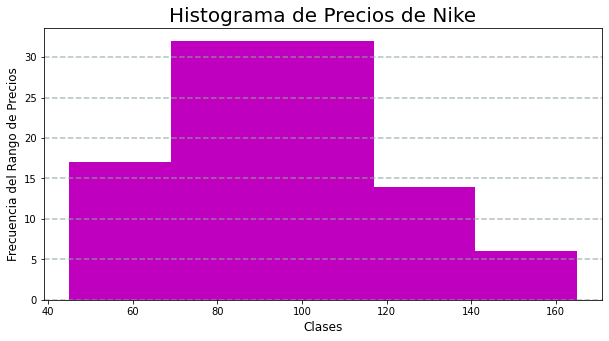

In [19]:
# Histograma de precios de Nike, sacar el número de clases con la regla de Sturges
plt.figure(figsize = (10, 5))
plt.hist(data[data["Marca"] == "Nike"]["Precio"], bins = (1 + int(np.log(len(data[data["Marca"] == "Nike"])))), color = "m")
plt.xlabel("Clases", fontsize = 12)
plt.ylabel("Frecuencia del Rango de Precios", fontsize = 12)
plt.title("Histograma de Precios de Nike", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show()

### Insigth 5

In [20]:
# Sacar la marca más "accesible" porque es vendida por más distribuidores
data.groupby("Marca")["Distribuidor"].nunique().sort_values(ascending = False).head(5)

Marca
Nike            15
Bearpaw         12
ELLIE SHOES      9
Nine West        9
Dr. Scholl's     9
Name: Distribuidor, dtype: int64

### Insigth 6

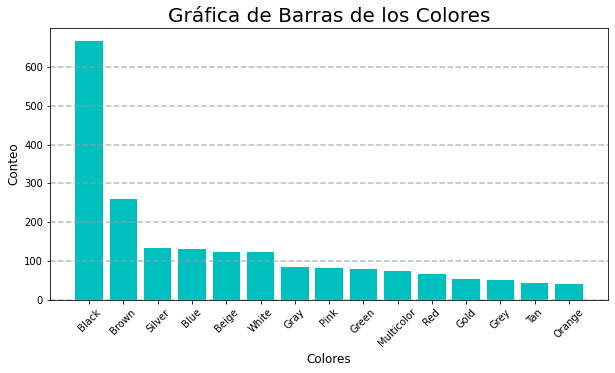

In [21]:
# Sacar gráfica de barras de los colores más comunes de los zapatos
fig = plt.figure(u"Gráfica de barras", figsize = (10, 5))
ax = fig.add_subplot(111)
datos_colores = list(data["Color"].value_counts().sort_values(ascending = False).head(15))
nombres = list(data["Color"].value_counts().sort_values(ascending = False).head(15).index)
ax.bar(range(len(datos_colores)), datos_colores, width = 0.8, align = "center", color = "c")
ax.set_xticks(range(len(datos_colores)))
ax.set_xticklabels(nombres)
plt.xticks(rotation = 45)
plt.xlabel("Colores", fontsize = 12)
plt.ylabel("Conteo", fontsize = 12)
plt.title("Gráfica de Barras de los Colores", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show()

# 2. Análisis de Similitud

In [22]:
# Recordar el dataset
data.head(5)

,Marca,Nombre,Color,Distribuidor,Precio
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",Overstock.com,13.886667
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,Overstock.com,18.715000
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",Overstock.com,16.390000
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,Overstock.com,17.100000
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,Overstock.com,15.040000


In [23]:
# Número de valores únicos de la columna de Marca
data["Marca"].nunique()

831

In [24]:
# Número de valores únicos de la columna de Nombre
data["Nombre"].nunique()

4095

In [25]:
# Número de valores únicos de la columna de Color
data["Color"].nunique()

1549

In [26]:
# Número de valores únicos de la columna de Distribuidor
data["Distribuidor"].nunique()

183

In [27]:
# Podemos disminuir el número de valores únicos en la cateogría de distribuidor para poder usar esa columna y agrupar por marca. 
# Es la única columna de la cual podemos disminuir los valores únicos ya que no hay forma de agrupar de acuerdo a
# determinado criterio las demás. Esta columna la pudimos disminuir porque hay diferentes vendedores en un mismo distribuidor,
# es decir, hay (un decir) 50 vendedores diferentes de Walmart y 100 diferentes en Ebay. Si sólo tomamos en cuenta la tienda
# distribuidora y no los vendedores, podemos reducir la cantidad de datos.
def normalize_merchant(x):
    new_merchants = []
    for i in range(0, len(x)):
        if "Walmart.com" in x.iloc[i]["Distribuidor"]:
            new_merchants.append("Walmart.com")
        elif "Ebay.com" in x.iloc[i]["Distribuidor"]:
            new_merchants.append("Ebay.com")
        else:
            new_merchants.append(x.iloc[i]["Distribuidor"])
    x["Nuevos Distribuidores"] = new_merchants
    x.drop(columns = "Distribuidor", inplace = True)
    x.rename(columns = {"Nuevos Distribuidores": "Distribuidor"}, inplace = True)
    return x
# Asignar un dataframe para acumulados
data = normalize_merchant(data)
# Mostrar datos
data.head(5)

,Marca,Nombre,Color,Precio,Distribuidor
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",13.886667,Overstock.com
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,18.715000,Overstock.com
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",16.390000,Overstock.com
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,17.100000,Overstock.com
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,15.040000,Overstock.com


In [28]:
# Vemos que la cantidad de valores únicos de distribuidores disminuyó considerablemente
data["Distribuidor"].nunique()

17

In [29]:
# Hacer una función para añadir columna de gama al dataset
def classification(x):
    if  data["Precio"].min() <= x < data["Precio"].quantile(0.25):
        z = "Gama muy baja"
    elif data["Precio"].quantile(0.25) <= x < data["Precio"].median():
        z = "Gama Baja"
    elif data["Precio"].median() <= x < data["Precio"].quantile(0.75):
        z = "Gama Media"
    elif data["Precio"].quantile(0.75) <= x <= data["Precio"].max():
        z= "Gama Alta"
    return z
# Sacar la nueva columna
data["Gama"] = data["Precio"].apply(classification)
# Mostrar datos
data.head(5)

,Marca,Nombre,Color,Precio,Distribuidor,Gama
0,1 World Sarongs,1 World Sarongs Women's Abstract Tiki Poncho (...,"Black,Blue,Brown",13.886667,Overstock.com,Gama muy baja
1,1 World Sarongs,1 World Sarongs Women's Embroidered/ Sequined ...,White,18.715000,Overstock.com,Gama muy baja
2,1 World Sarongs,1 World Sarongs Women's Hibiscus Design Tube T...,"Other,Pink,White,Yellow",16.390000,Overstock.com,Gama muy baja
3,1 World Sarongs,1 World Sarongs Women's Hibiscus One Size Saro...,Blue,17.100000,Overstock.com,Gama muy baja
4,1 World Sarongs,1 World Sarongs Women's Light Turquoise Mini D...,Blue,15.040000,Overstock.com,Gama muy baja


In [30]:
# Hacer nuestro nuevo dataset de gamas
gama_data = pd.pivot_table(data = data, index = data["Marca"], columns = data["Gama"], fill_value = 0, aggfunc = "count", 
                          values = ["Gama"])
# Mostrar datos
gama_data.head(5)

Gama                                   
Gama            Gama Alta Gama Baja Gama Media Gama muy baja
Marca                                                       
1 World Sarongs         0         0          0             7
2 Lips Too              0         5          1             3
79 SCII                 0         0          0             1
A'rcopedico             1         0          0             0
A2 By Aerosoles         0         0          1             0

In [31]:
# Hacer nuestro nuevo dataset de distribuidores
merchant_data = pd.pivot_table(data = data, index = data["Marca"], columns = data["Distribuidor"], fill_value = 0, 
                               aggfunc = "count", values = ["Distribuidor"])
# Mostrar datos
merchant_data.head(5)

Distribuidor                                                \
Distribuidor      Amazon.com Apparel Save CARiD.com City Steps Deal Genius   
Marca                                                                        
1 World Sarongs            0            0         0          0           0   
2 Lips Too                 0            0         0          0           0   
79 SCII                    1            0         0          0           0   
A'rcopedico                0            0         0          0           0   
A2 By Aerosoles            0            0         0          0           0   

                                                                              \
Distribuidor    Designer Shoes and Fashions Ebay.com Overstock.com Sears.com   
Marca                                                                          
1 World Sarongs                           0        0             7         0   
2 Lips Too                                0        0             0         7   
79 SCII                                   0        0             0         0   
A'rcopedico                               0        0             0         0   
A2 By Aerosoles                           0        0             0         0   

                                                                            \
Distribuidor    ShoeMetro CA Shoes.com Walmart.com autoplicity.com eshades   
Marca                                                                        
1 World Sarongs            0         0           0               0       0   
2 Lips Too                 0         0           2               0       0   
79 SCII                    0         0           0               0       0   
A'rcopedico                0         0           1               0       0   
A2 By Aerosoles            0         0           1               0       0   

                                                                     
Distribuidor    homedepot.com www.ralphlauren.com zhongyuanhengjing  
Marca                                                                
1 World Sarongs             0                   0                 0  
2 Lips Too                  0                   0                 0  
79 SCII                     0                   0                 0  
A'rcopedico                 0                   0                 0  
A2 By Aerosoles             0                   0                 0

In [32]:
# Concatenar datos de gamas y distribuidores
data = gama_data.join(merchant_data)
# Mostrar datos
data.head(5)

Gama                                    Distribuidor  \
Gama            Gama Alta Gama Baja Gama Media Gama muy baja   Amazon.com   
Marca                                                                       
1 World Sarongs         0         0          0             7            0   
2 Lips Too              0         5          1             3            0   
79 SCII                 0         0          0             1            1   
A'rcopedico             1         0          0             0            0   
A2 By Aerosoles         0         0          1             0            0   

                                                               \
Gama            Apparel Save CARiD.com City Steps Deal Genius   
Marca                                                           
1 World Sarongs            0         0          0           0   
2 Lips Too                 0         0          0           0   
79 SCII                    0         0          0           0   
A'rcopedico                0         0          0           0   
A2 By Aerosoles            0         0          0           0   

                                             ...                          \
Gama            Designer Shoes and Fashions  ... Overstock.com Sears.com   
Marca                                        ...                           
1 World Sarongs                           0  ...             7         0   
2 Lips Too                                0  ...             0         7   
79 SCII                                   0  ...             0         0   
A'rcopedico                               0  ...             0         0   
A2 By Aerosoles                           0  ...             0         0   

                                                                            \
Gama            ShoeMetro CA Shoes.com Walmart.com autoplicity.com eshades   
Marca                                                                        
1 World Sarongs            0         0           0               0       0   
2 Lips Too                 0         0           2               0       0   
79 SCII                    0         0           0               0       0   
A'rcopedico                0         0           1               0       0   
A2 By Aerosoles            0         0           1               0       0   

                                                                     
Gama            homedepot.com www.ralphlauren.com zhongyuanhengjing  
Marca                                                                
1 World Sarongs             0                   0                 0  
2 Lips Too                  0                   0                 0  
79 SCII                     0                   0                 0  
A'rcopedico                 0                   0                 0  
A2 By Aerosoles             0                   0                 0  

[5 rows x 21 columns]

In [33]:
# Hacer el dataset con el que vamos a trabajar
datan = data.reset_index(drop = True)
# Mostrar datos
datan.head(5)

Gama                                    Distribuidor               \
Gama Gama Alta Gama Baja Gama Media Gama muy baja   Amazon.com Apparel Save   
0            0         0          0             7            0            0   
1            0         5          1             3            0            0   
2            0         0          0             1            1            0   
3            1         0          0             0            0            0   
4            0         0          1             0            0            0   

                                                                   ...  \
Gama CARiD.com City Steps Deal Genius Designer Shoes and Fashions  ...   
0            0          0           0                           0  ...   
1            0          0           0                           0  ...   
2            0          0           0                           0  ...   
3            0          0           0                           0  ...   
4            0          0           0                           0  ...   

                                                                 \
Gama Overstock.com Sears.com ShoeMetro CA Shoes.com Walmart.com   
0                7         0            0         0           0   
1                0         7            0         0           2   
2                0         0            0         0           0   
3                0         0            0         0           1   
4                0         0            0         0           1   

                                                                \
Gama autoplicity.com eshades homedepot.com www.ralphlauren.com   
0                  0       0             0                   0   
1                  0       0             0                   0   
2                  0       0             0                   0   
3                  0       0             0                   0   
4                  0       0             0                   0   

                        
Gama zhongyuanhengjing  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 21 columns]

In [34]:
# Sacar distancia euclideana
dist = sc.pdist(datan, "euclidean")
# Mostrar la distancia
dist

array([12.        ,  9.2736185 , 10.        , ...,  2.        ,
        2.        ,  1.41421356])

In [35]:
# Sacar la matriz de similitud
d1 = pd.DataFrame(sc.squareform(dist))
# Mostrar la matriz de similitud
d1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,821,822,823,824,825,826,827,828,829,830
0,0.000000,12.000000,9.273618,10.000000,10.000000,8.602325,8.485281,10.295630,10.000000,10.295630,...,9.273618,10.000000,10.295630,10.000000,9.486833,9.273618,9.486833,10.000000,10.000000,10.000000
1,12.000000,0.000000,9.165151,9.273618,9.165151,8.717798,9.165151,9.797959,8.602325,6.928203,...,9.165151,8.124038,9.380832,9.273618,7.071068,8.944272,8.366600,9.486833,9.165151,8.717798
2,9.273618,9.165151,0.000000,2.000000,2.000000,4.472136,1.414214,3.162278,2.000000,3.162278,...,1.414214,2.000000,3.162278,2.000000,2.449490,1.414214,2.449490,2.000000,2.000000,2.000000
3,10.000000,9.273618,2.000000,0.000000,1.414214,4.472136,2.000000,2.449490,2.000000,3.162278,...,2.000000,2.000000,1.414214,0.000000,2.828427,1.414214,2.000000,1.414214,1.414214,1.414214
4,10.000000,9.165151,2.000000,1.414214,0.000000,4.472136,2.000000,3.162278,1.414214,3.162278,...,2.000000,2.000000,2.449490,1.414214,2.828427,1.414214,2.000000,2.000000,0.000000,1.414214
